## DHELYA APRILIANI PUTRI

## PYTN-KS019-013

## ASSIGNMENT 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [4]:
df_bank_additional_full = pd.read_csv('bank-additional-full.csv', sep=';')
df_bank_additional = pd.read_csv('bank-additional.csv', sep=';')

In [6]:
# Menyalin data
df = df_bank_additional_full.copy()
df_ = df_bank_additional.copy()

In [7]:
# 5 data terakhir
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
# Memeriksa dimensi dari dataset (jumlah baris, jumlah kolom)
df.shape

(41188, 21)

In [9]:
# Ringkasan dataset (tipe masing-masing kolom pada data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Berdasarkan yang sudah diketahui sebelumnya bahwa terdapat 41188 baris/observasi dan terdapat 21 kolom/atribut, di mana terdapat 10 kolom dengan tipe numerik dan 11 kolom dengan tipe kategorik

# DATA CLEANING

In [10]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

12

In [11]:
# Memeriksa apakah terdapat missing values dalam data
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Berdasarkan output di atas, diketahui bahwa terdapat 12 duplikasi dan tidak terdapat missing values, sehingga duplikasi dalam data akan dihapus.

In [12]:
# Menghapus duplikasi dalam data
df.drop_duplicates(keep='last', inplace=True)


In [13]:
# Memeriksa kembali apakah masih terdapat duplikasi
df.duplicated().sum()

0

In [14]:
# Mengembalikan nomor indeks pada data
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

# Eksplorasi data

Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam, mengetahui variabel atau fitur apa saja yang diduga berpengaruh dalam prediksi variabel targetnya, dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan prediksi model.

# Frekuensi nilai pada variabel y

In [15]:
df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

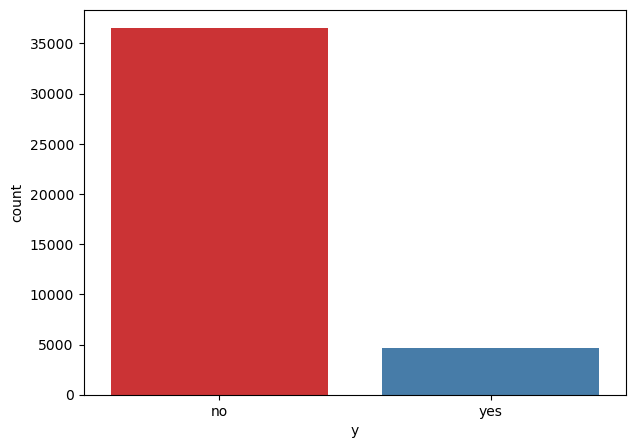

In [16]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="y", data=df, palette="Set1")
plt.show()

Berdasarkan output di atas, diketahui bahwa terdapat 36537 "no" dan terdapat 4639 "yes". Hal ini dapat diartikan bahwa, sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.

# Nilai dan distribusi statistik masing-masing kolom numerik

In [18]:
# Nilai statistik kolom numerik
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


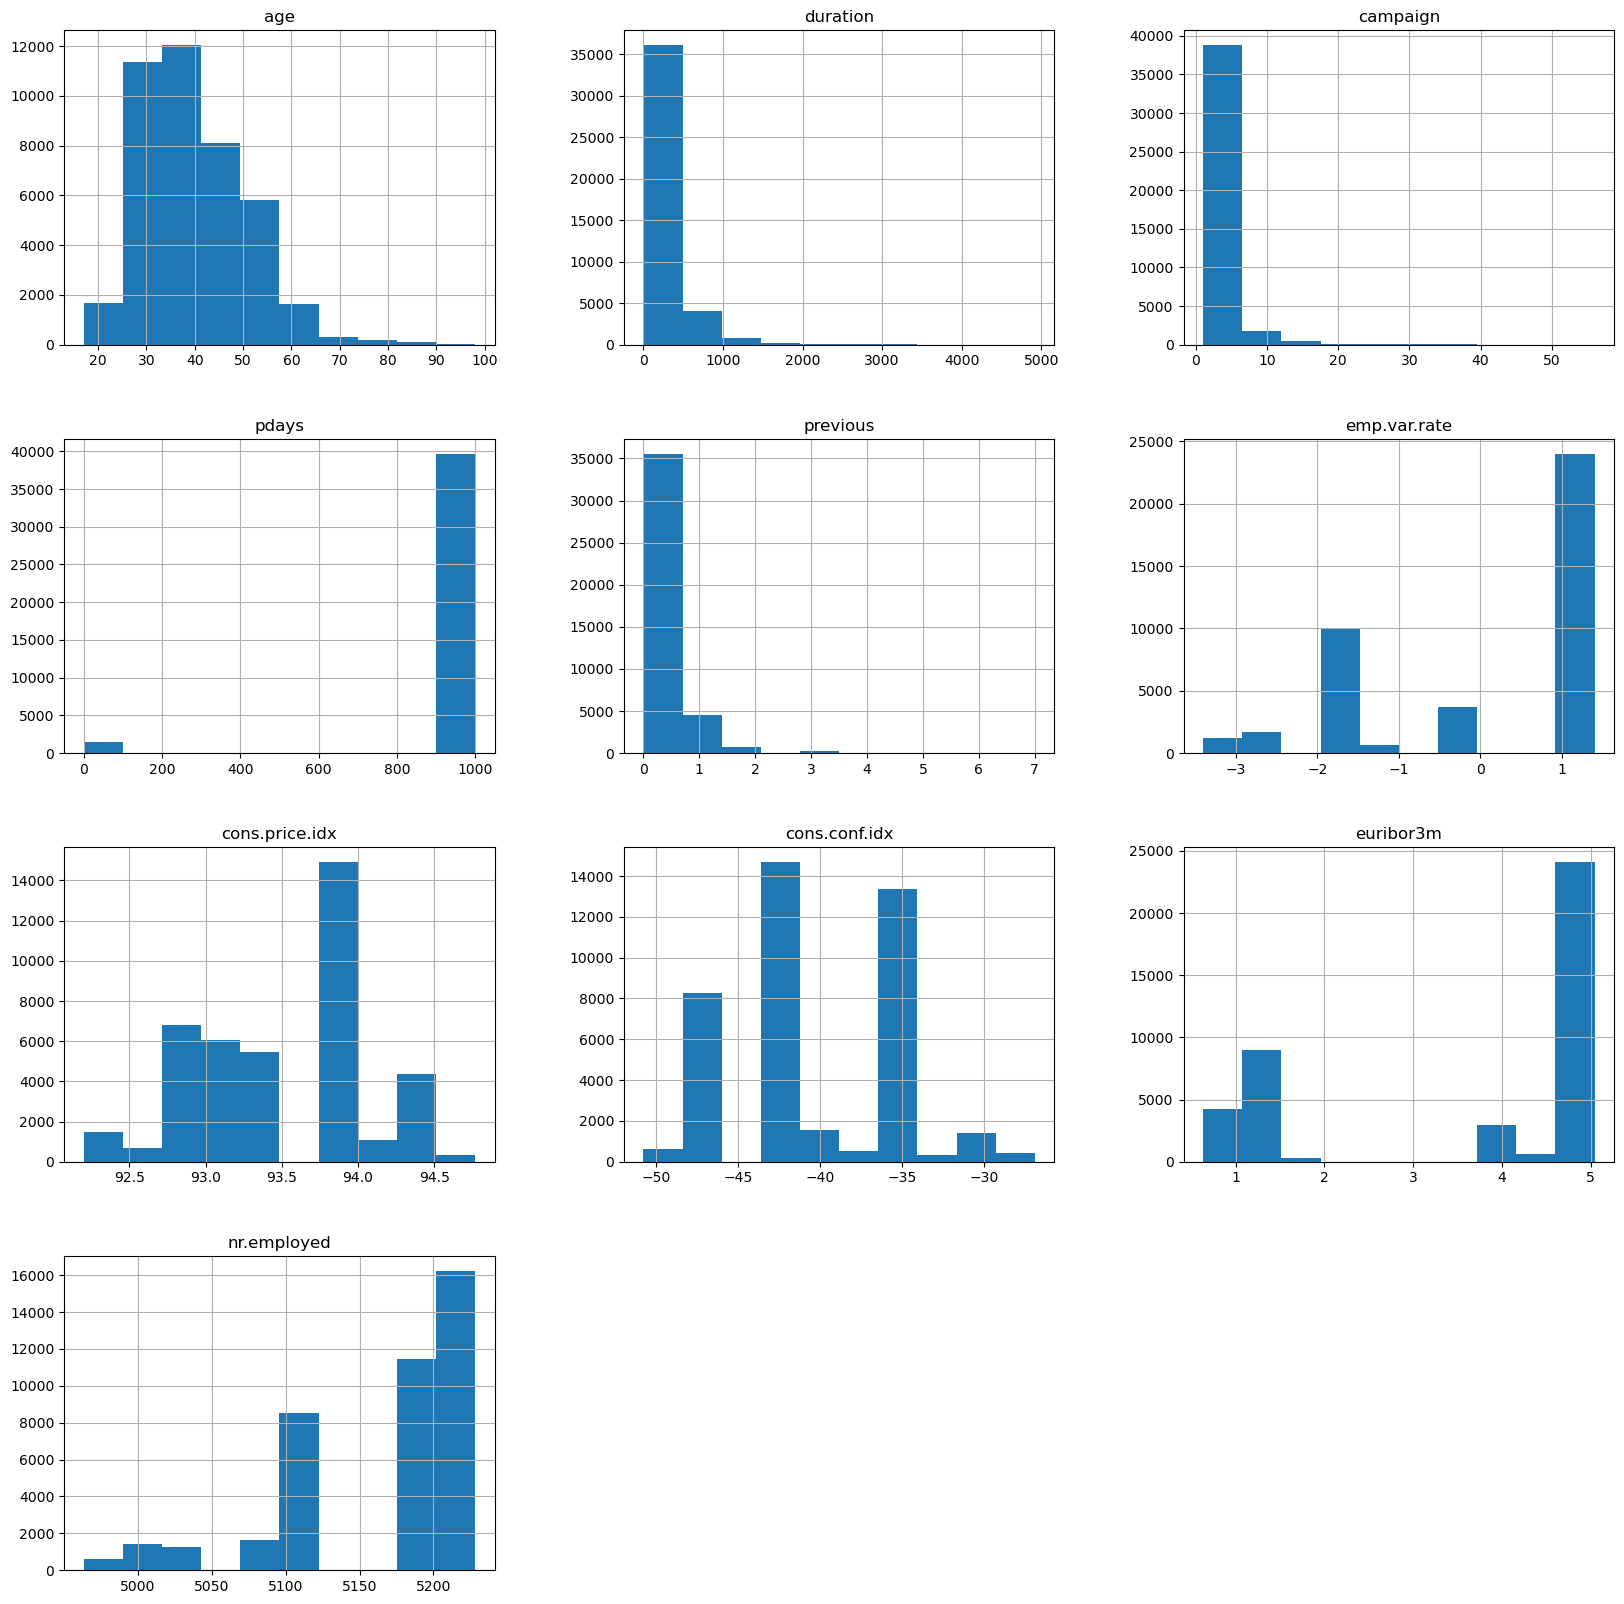

In [19]:
# Visualisasi menggunakan histogram
df.hist(figsize=(20, 20))
plt.show()

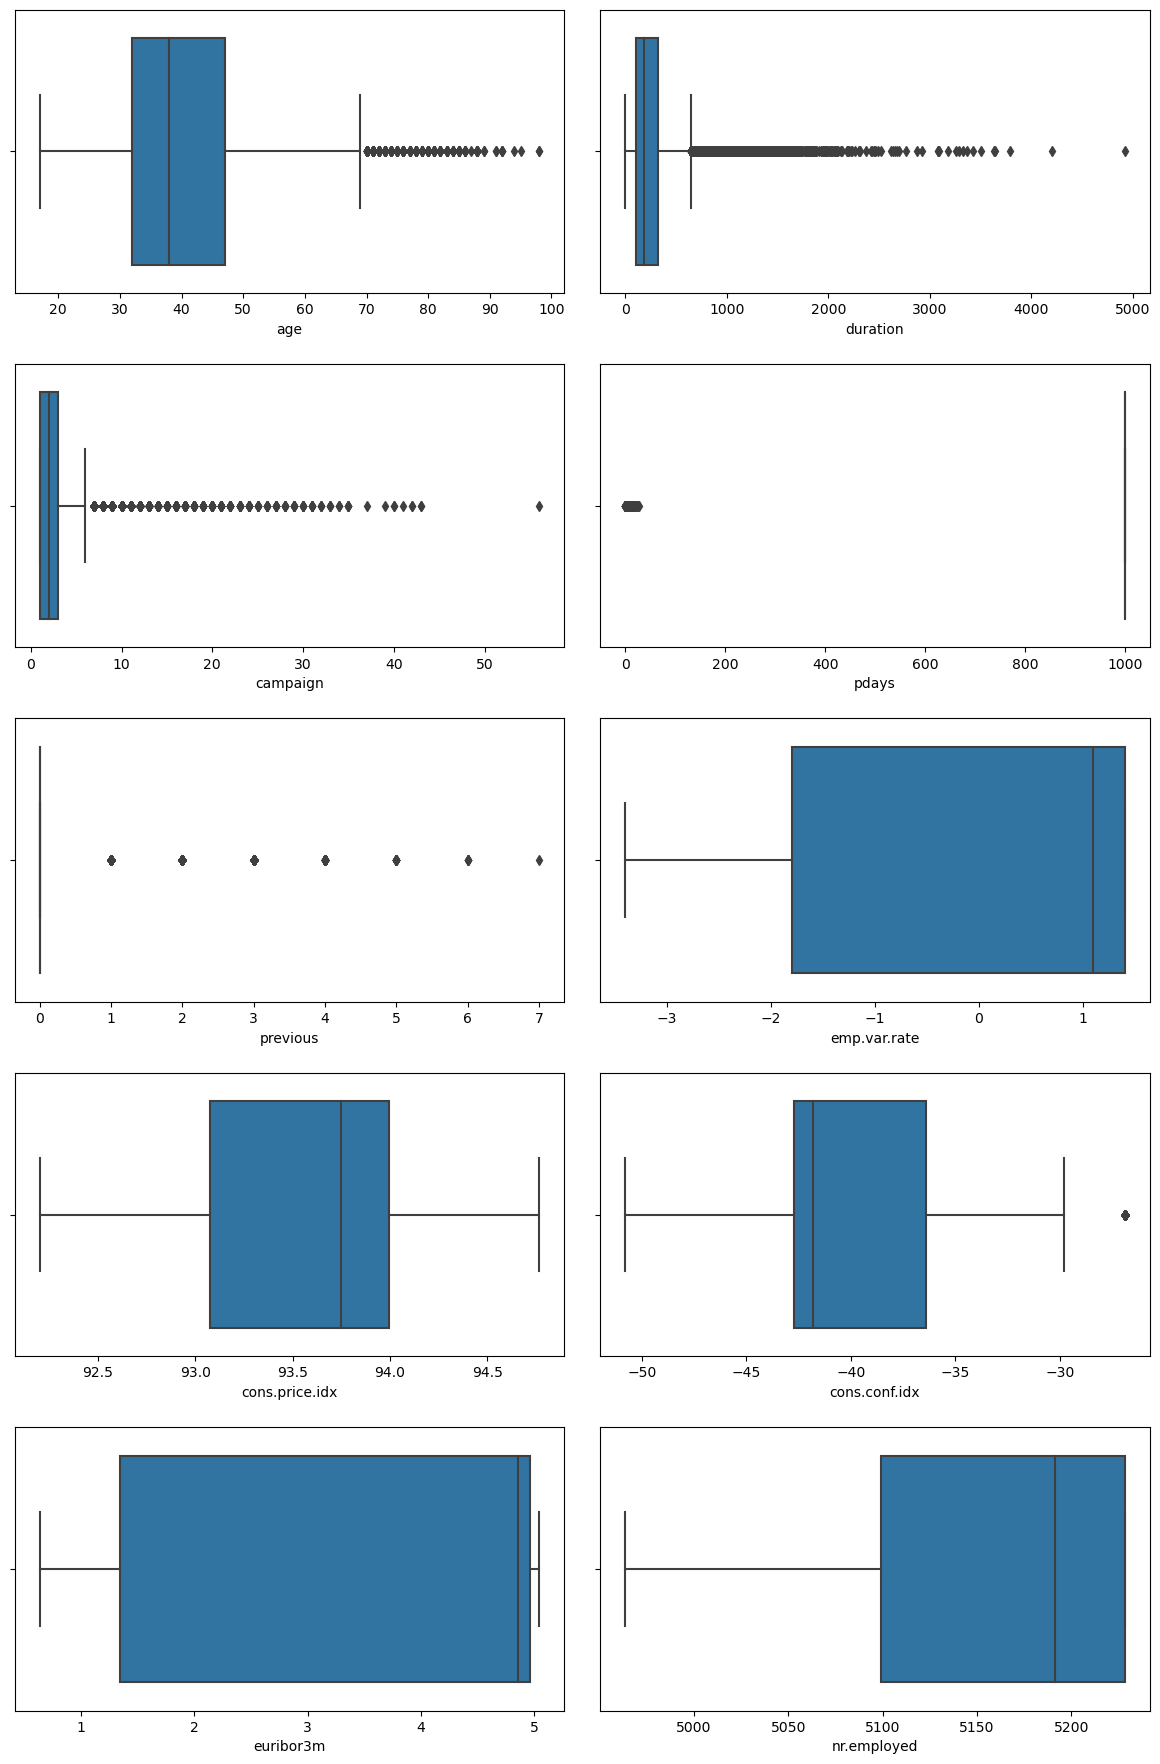

In [20]:
# Visualisasi dengan box plot
cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5,2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=ax[i])

fig.tight_layout(pad=2.0)

Berdasarkan output plot nilai dan distribusi statistik masing-masing kolom numerik di atas, diketahui bahwa:

Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
Rata-rata durasi telepon terakhir bersama klien adalah sekitar 250 detik.
Kontak klien yang dihubungi dalam pelaksanaan kampanye ini adalah 2-3 kontak.
Kebanyakan klien tidak dihubungi atau tidak melakukan kontak pada saat kampanye sebelumnya. Hal ini ditandai dengan nilai 999 pada kolom campaign dan juga nilai 0 pada kolom previous yang mempunyai frekuensi tinggi.
Karakteristik sosial dan ekonomi pada saat kampanye juga disertakan dalam analisis untuk dilihat pengaruhnya pada keputusan klien dalam mengambil keputusan untuk berlangganan deposito berjangka, di mana jika dilihat dari distribusi frekuensi nilai karakteristik sosial dan ekonomi pada saat itu cukup bervariasi.

# Distribusi statistik masing-masing kolom numerik berdasarkan variabel y

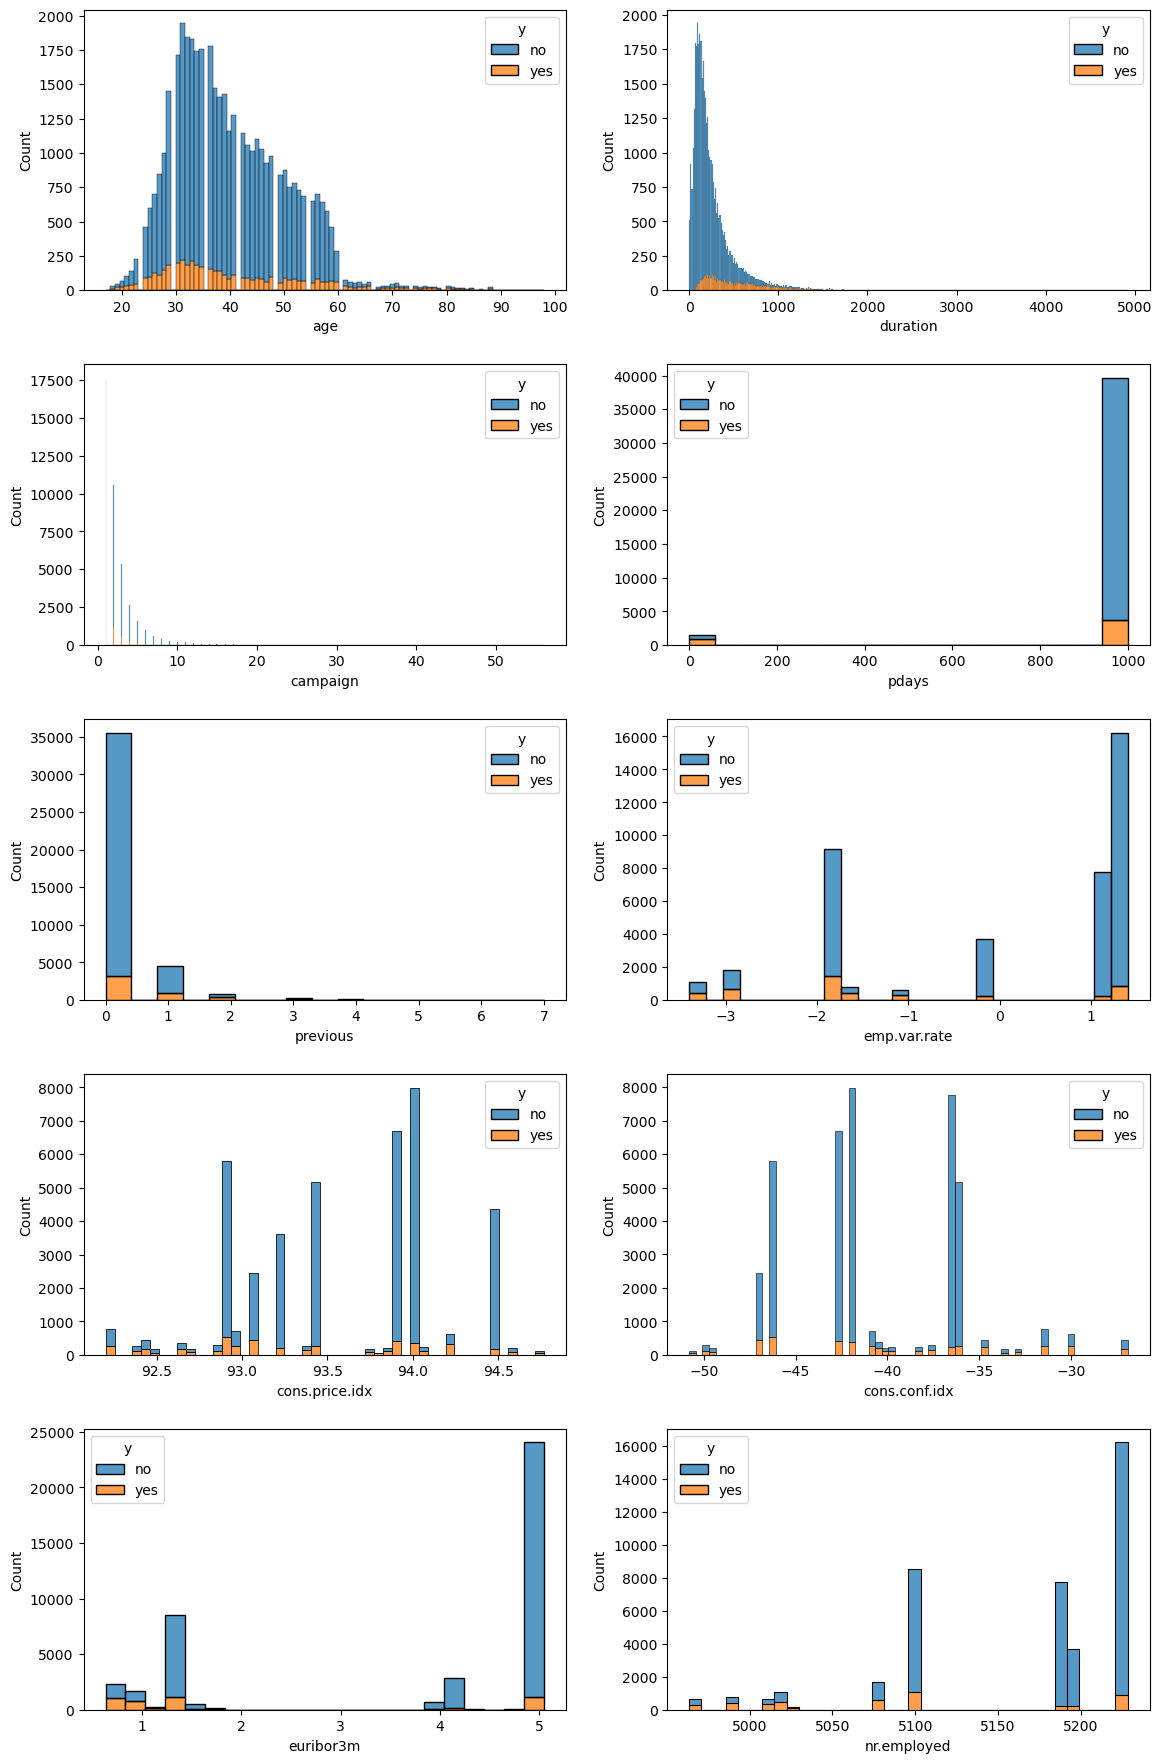

In [21]:
# Visualisasi menggunakan histogra
cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(5, 2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='y', multiple='stack', ax=ax[i])

fig.tight_layout(pad=2.0)

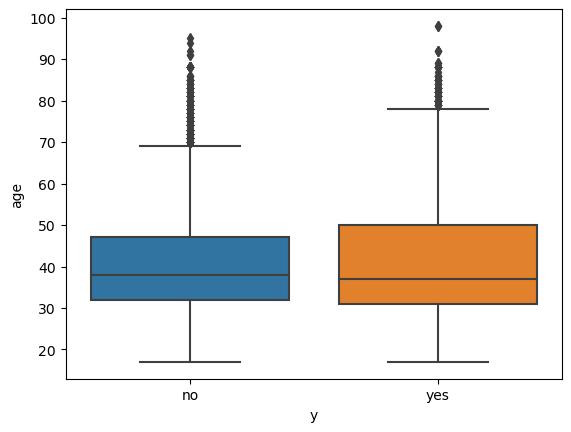

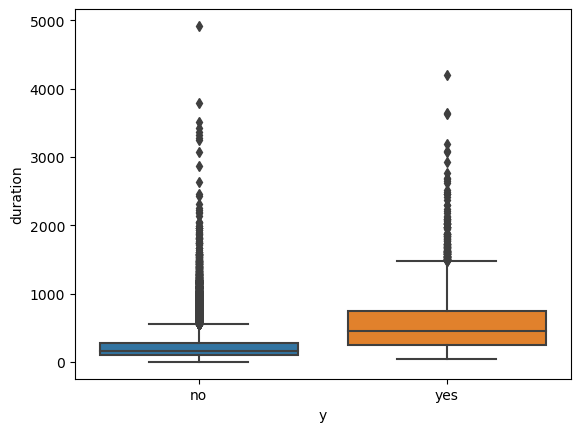

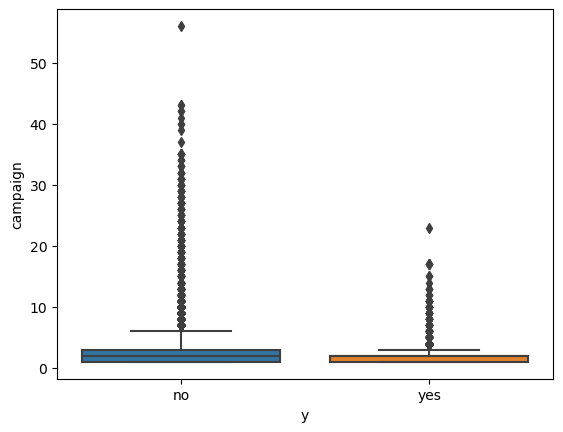

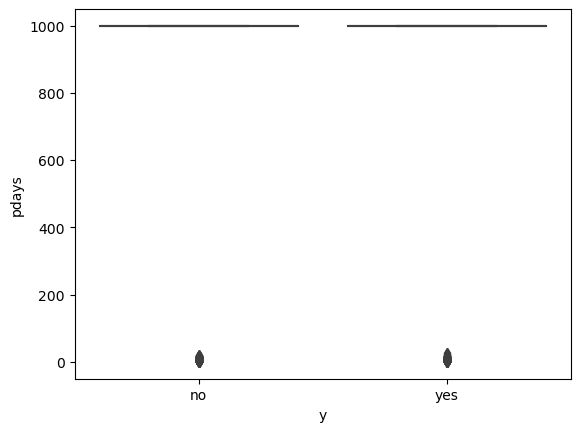

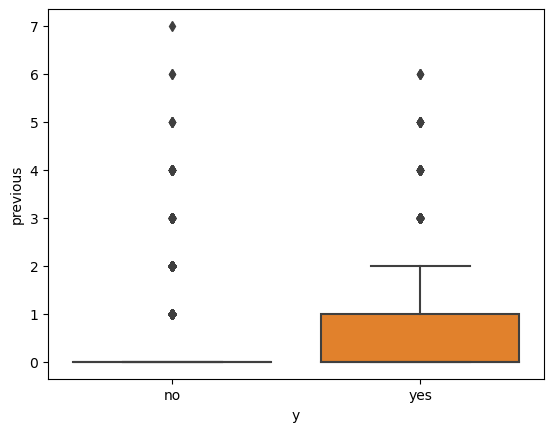

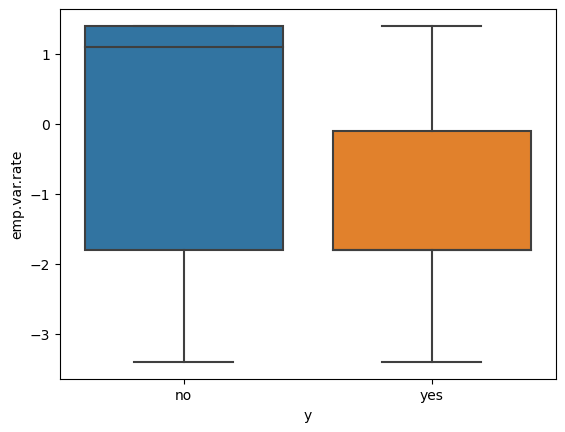

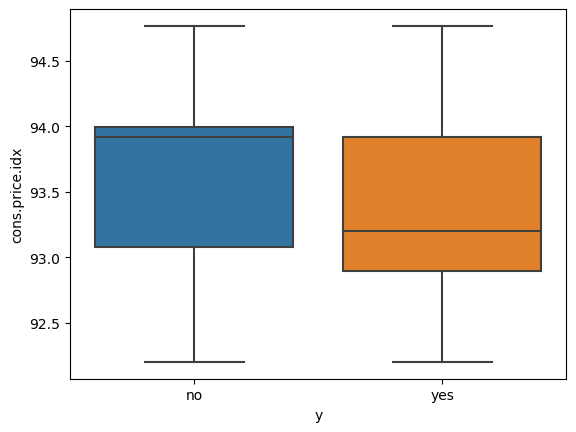

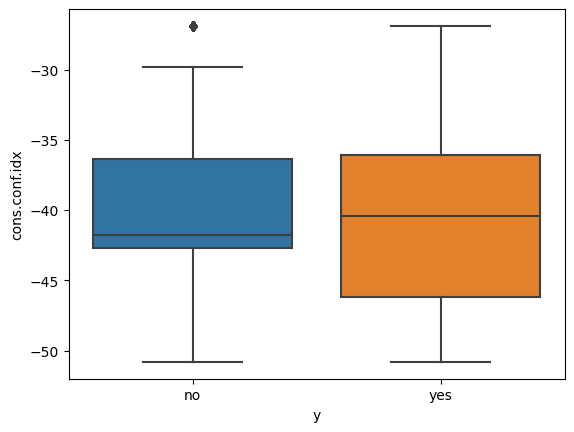

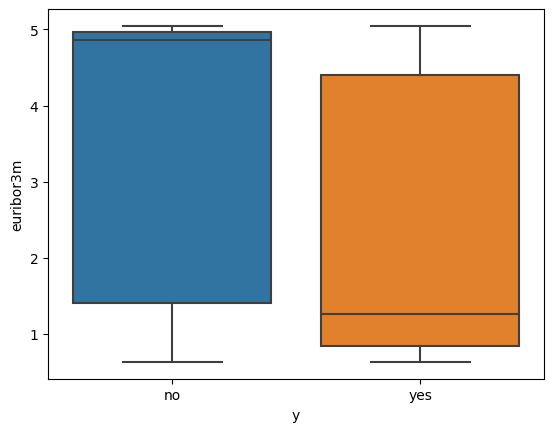

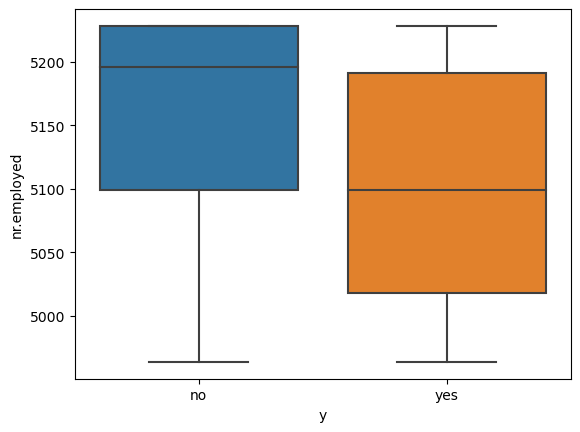

In [22]:
num_var = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

for i in num_var:
    sns.boxplot(x = 'y',y = i,data = df)
    plt.show()

Berdasarkan plot distribusi statistik yang dikelompokkan berdasarkan nilai pada variabel y-nya, diketahui bahwa:

Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien dengan umur 30-40 tahun.
Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar.
Untuk melihat pengaruh variabel numerik lain terhadap variabel y dapat lebih jelas menggunakan matriks korelasi.

## Nilai dan distribusi statistik masing-masing kolom kategorik berdasarkan variabel `y`

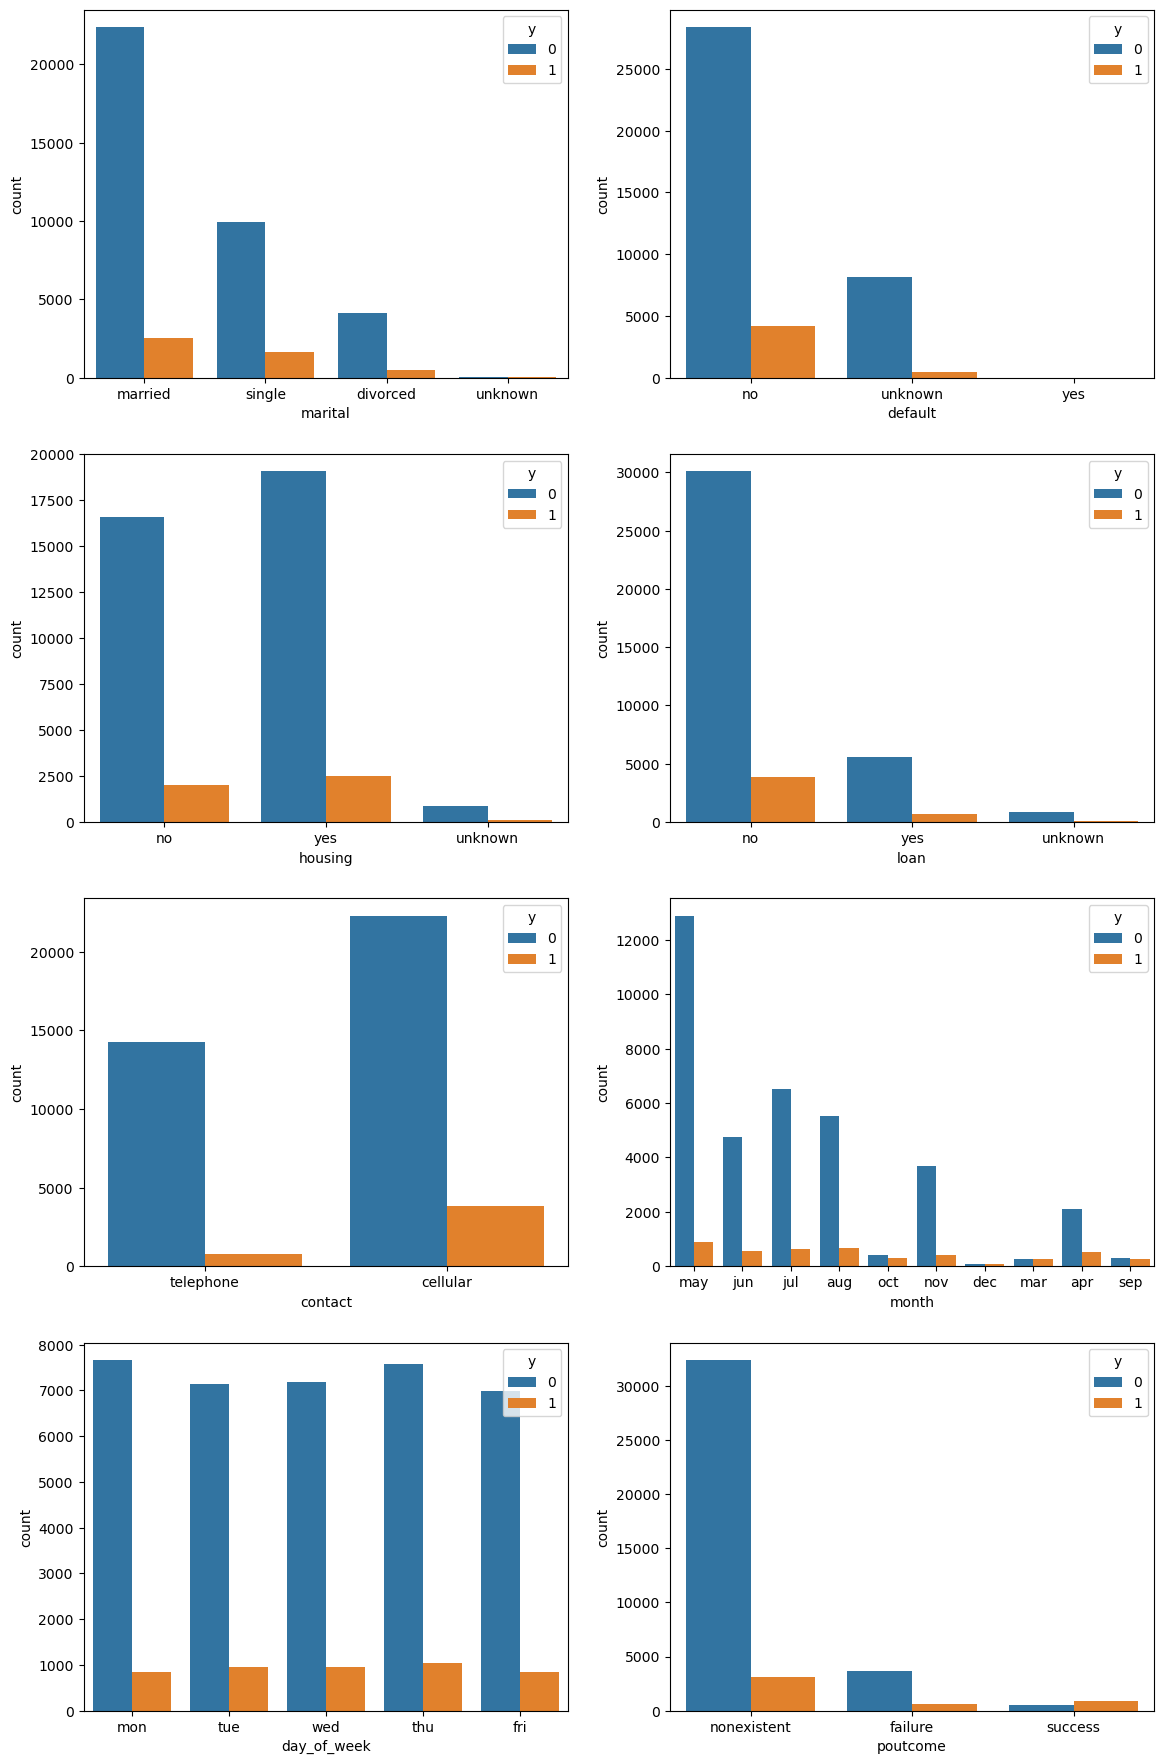

In [25]:
# Visualisasi menggunakan countplot
cols = ['marital','default','housing','loan','contact','month','day_of_week','poutcome']

fig, ax = plt.subplots(4, 2, figsize=(12,18))
ax = ax.reshape(-1)

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i])

fig.tight_layout(pad=2.0)

<Axes: xlabel='job', ylabel='count'>

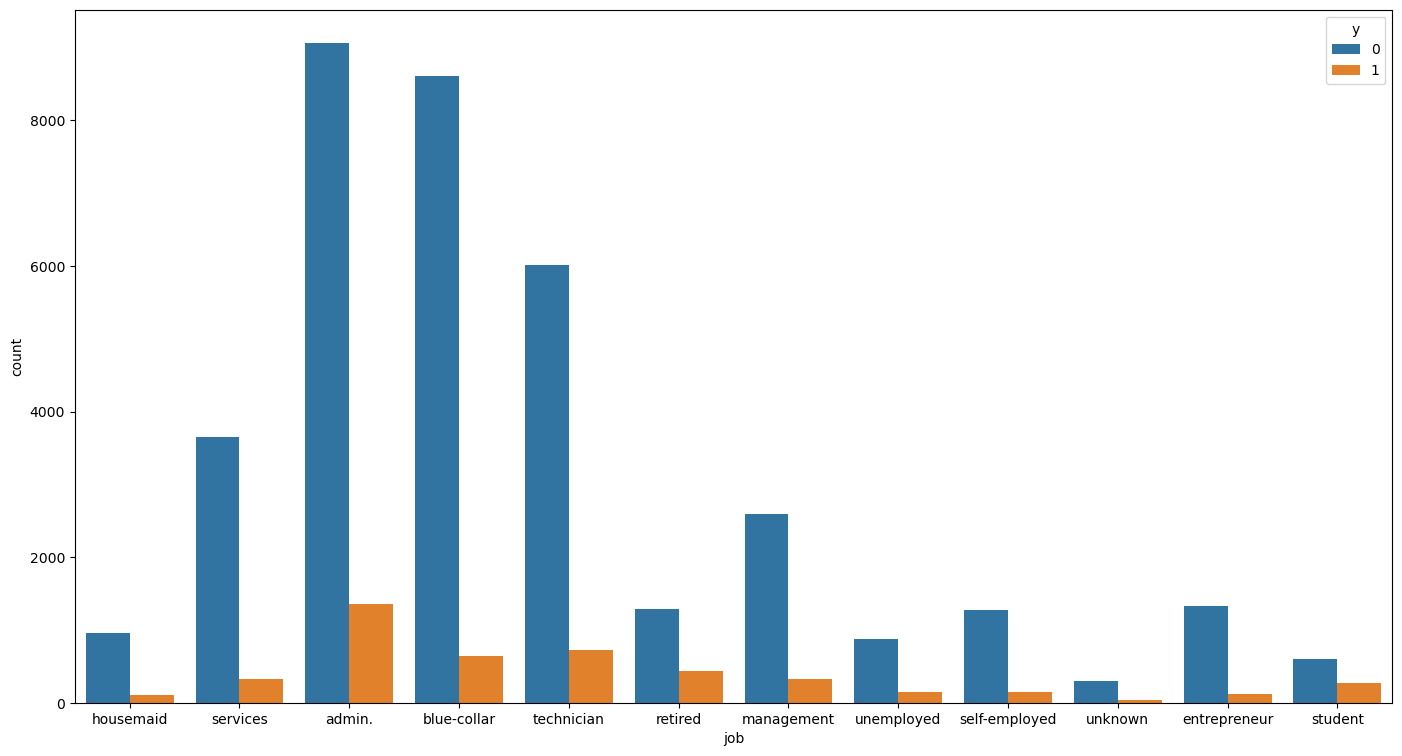

In [26]:
plt.figure(figsize=(17,9))
sns.countplot(data=df, x='job', hue='y')

<Axes: xlabel='education', ylabel='count'>

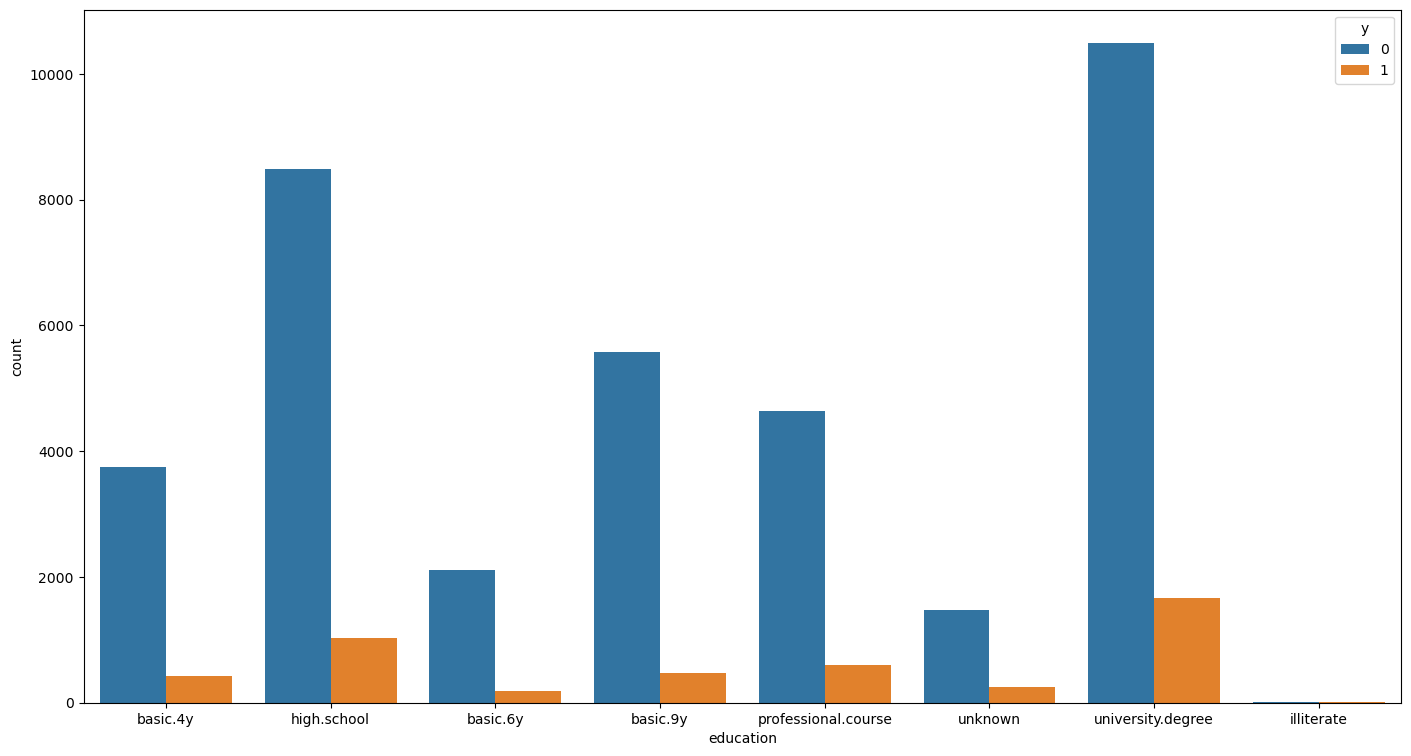

In [28]:
plt.figure(figsize=(17,9))
sns.countplot(data=df, x='education', hue='y')

Berdasarkan plot di atas, dapat diketahui bahwa:
1. Mayoritas klien adalah klien dengan status sudah menikah, di mana kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang sudah menikah.
2. Mayoritas klien juga memiliki rumah. Namun, kepemilikan rumah cenderung tidak memiliki pengaruh dalam keputusan klien untuk memilih berlangganan deposito atau tidak.
3. Kebanyakan klien yang memilih untuk berlangganan deposito berjangka adalah klien yang tidak memiliki hutang/loan.
4. Klien yang memilih untuk berlangganan deposito juga kebanyakan bekerja dengan profesi admin.
5. Mayoritas klien memiliki tingkat pendidikan yaitu *university degree*.
6. Waktu kontak yang dilakukan dengan klien tidak mempengaruhi keputusan klien untuk memilih berlangganan deposito atau tidak.

# Data preprocessing

# Menghapus kolom yang tidak memiliki pengaruh pada variabel y

Sebelumnya diketahui bahwa kolom month dan day_of_week tidak memiliki pengaruh pada variabel y. Untuk kolom Age, campaign, dan cons.conf.idx tidak dihapus dan masih akan disertakan dalam analisis karena ketiga variabel ini akan dilihat pengaruhnya berdasarkan nilai feature importance.

In [29]:
df.drop(['month','day_of_week'], axis=1, inplace=True)

## Tidak menyertakan *outlier*

In [30]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [31]:
df = df[df['age']<70].copy()

In [32]:
df = df[df['campaign']<10].copy()

In [33]:
df.reset_index(inplace=True)

# Standarisasi data

Standarisasi data dilakukan karena masing-masing kolom numerik tidak memiliki distribusi tertentu dan memiliki satuan yang berbeda.

In [34]:
# Standarisasi dengan StandardScaler
df_scalling = df[['age','duration','pdays','previous','emp.var.rate','campaign',
                  'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

scaler = StandardScaler()
scaler.fit(df_scalling)
scaled_features = scaler.transform(df_scalling)
df_scalling = pd.DataFrame(scaled_features,columns = df_scalling.columns)
df_scalling.head()

,age,duration,pdays,previous,emp.var.rate,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.696628,0.001326,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
1,1.799962,-0.430076,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
2,-0.266721,-0.133487,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
3,0.043281,-0.422373,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776
4,1.696628,0.178509,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776


# Encoder menggunakan pd.get_dummies pada kolom kategorik

In [35]:
df_scalling['job'] = df['job']
df_scalling['marital'] = df['marital']
df_scalling['education'] = df['education']
df_scalling['default'] = df['default']
df_scalling['housing'] = df['housing']
df_scalling['loan'] = df['loan']
df_scalling['contact'] = df['contact']
df_scalling['poutcome'] = df['poutcome']

In [36]:
# Encoder
df_new = pd.get_dummies(df_scalling)

In [37]:
df_new['y'] = df['y']

In [38]:
df_new.head()

,age,duration,pdays,previous,emp.var.rate,campaign,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,1.696628,0.001326,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,True,False,False,False,True,False,True,False,0
1,1.799962,-0.430076,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,True,False,False,False,True,False,True,False,0
2,-0.266721,-0.133487,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,True,True,False,False,False,True,False,True,False,0
3,0.043281,-0.422373,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,True,False,False,False,True,False,True,False,0
4,1.696628,0.178509,0.192459,-0.350361,0.651822,-0.760333,0.734282,0.903407,0.71376,0.330776,...,False,False,False,True,False,True,False,True,False,0


# Splitting data

In [39]:
X = df_new.drop('y', axis=1)
y = df_new.y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pendefinisian model

In [41]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(kernel='linear')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=200)
nb = GaussianNB()

# Pelatihan model

In [42]:
# Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# K-NN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [44]:
# SVM

#Mempersiapkan data
df_.drop_duplicates(keep='last', inplace=True)
df_.reset_index(inplace=True)
df_.drop('index', axis=1, inplace=True)
df_.drop(['month','day_of_week'], axis=1, inplace=True)
df_ = df_[df_['age']<70].copy()
df_ = df_[df_['campaign']<10].copy()
df_.reset_index(inplace=True)

df_scalling_ = df_[['age','duration','pdays','previous','emp.var.rate','campaign',
                  'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

scaler_ = StandardScaler()
scaler_.fit(df_scalling_)
scaled_features_ = scaler_.transform(df_scalling_)
df_scalling_ = pd.DataFrame(scaled_features_,columns = df_scalling_.columns)

df_scalling_['job'] = df_['job']
df_scalling_['marital'] = df_['marital']
df_scalling_['education'] = df_['education']
df_scalling_['default'] = df_['default']
df_scalling_['housing'] = df_['housing']
df_scalling_['loan'] = df_['loan']
df_scalling_['contact'] = df_['contact']
df_scalling_['poutcome'] = df_['poutcome']

df_new_ = pd.get_dummies(df_scalling_)
df_new_['y'] = df_['y']
mapping = {"yes":1,
          "no":0}

df_new_['y'] = df_['y'].map(mapping)

X_ = df_new_.drop('y', axis=1)
y_ = df_new_.y

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=0)

In [45]:
svm.fit(X_train_, y_train_)
y_pred_svm = svm.predict(X_test_)

In [46]:
# Decision Tree
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [47]:
# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [48]:
# Gaussian NB
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Evaluasi model

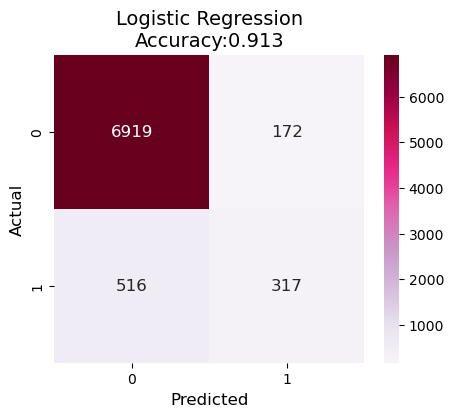

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7091
           1       0.65      0.38      0.48       833

    accuracy                           0.91      7924
   macro avg       0.79      0.68      0.72      7924
weighted avg       0.90      0.91      0.90      7924

Accuracy Score:- 0.9131751640585563
Precision Score:- 0.6482617586912065
Recall Score:- 0.38055222088835533


In [49]:
# Create a confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')

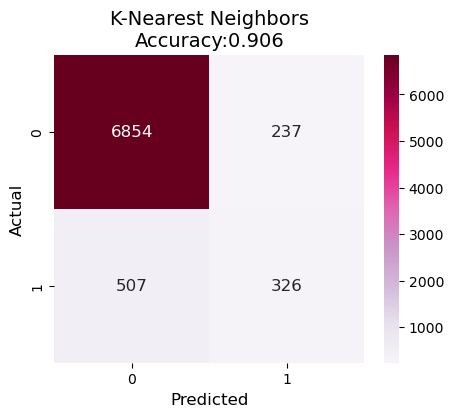

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7091
           1       0.58      0.39      0.47       833

    accuracy                           0.91      7924
   macro avg       0.76      0.68      0.71      7924
weighted avg       0.89      0.91      0.90      7924

Accuracy Score:- 0.906108026249369
Precision Score:- 0.5790408525754884
Recall Score:- 0.39135654261704683


In [50]:
# Create a confusion Matrix for K-NN
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')

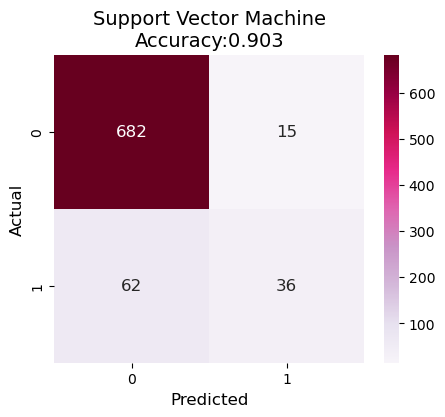

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       697
           1       0.71      0.37      0.48        98

    accuracy                           0.90       795
   macro avg       0.81      0.67      0.71       795
weighted avg       0.89      0.90      0.89       795

Accuracy Score:- 0.9031446540880503
Precision Score:- 0.7058823529411765
Recall Score:- 0.3673469387755102


In [51]:
# Create a confusion Matrix for SVM
cm = confusion_matrix(y_test_, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test_, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test_, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test_, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test_,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test_,y_pred_svm)}')

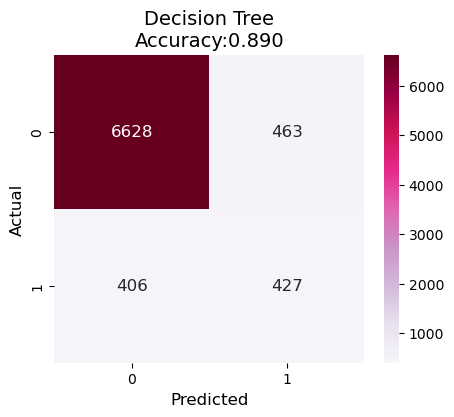

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7091
           1       0.48      0.51      0.50       833

    accuracy                           0.89      7924
   macro avg       0.71      0.72      0.72      7924
weighted avg       0.89      0.89      0.89      7924

Accuracy Score:- 0.8903331650681474
Precision Score:- 0.4797752808988764
Recall Score:- 0.5126050420168067


In [52]:
# Create a confusion Matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_tree)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_tree)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_tree)}')

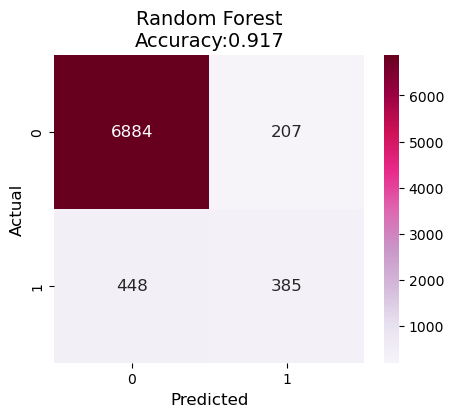

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7091
           1       0.65      0.46      0.54       833

    accuracy                           0.92      7924
   macro avg       0.79      0.72      0.75      7924
weighted avg       0.91      0.92      0.91      7924

Accuracy Score:- 0.9173397274103988
Precision Score:- 0.6503378378378378
Recall Score:- 0.46218487394957986


In [53]:
#  Create a confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')

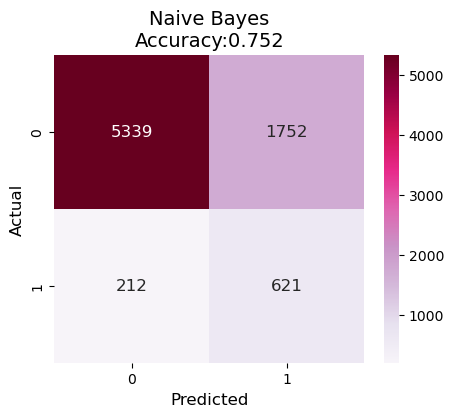

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      7091
           1       0.26      0.75      0.39       833

    accuracy                           0.75      7924
   macro avg       0.61      0.75      0.62      7924
weighted avg       0.89      0.75      0.80      7924

Accuracy Score:- 0.7521453811206461
Precision Score:- 0.26169405815423513
Recall Score:- 0.7454981992797118


In [54]:
# Create a confusion Matrix for Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')

Berdasarkan hasil klasifikasi, diketahui bahwa semua algoritma belum memberikan performa prediksi klasifikasi yang cukup baik. Hal ini dikarenakan data yang digunakan adalah imbalanced dataset sehingga diperlukan penanganan lebih lanjut untuk kasus ini. Namun, dilihat dari masing-masing performa prediksi, algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.91, nilai presisi sebesar 0.65, nilai recall 0.47, dan f1-score sebesar 0.53.

# Features Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek feature importance dari data, yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [56]:
data = df_new.copy()
data.drop('y', axis=1, inplace=True)
feature_names = list(data.columns.values)

In [57]:
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

duration                         3.026799e-01
euribor3m                        1.108287e-01
age                              8.767868e-02
nr.employed                      5.622642e-02
campaign                         4.202790e-02
cons.conf.idx                    3.675438e-02
pdays                            3.072506e-02
cons.price.idx                   3.055405e-02
emp.var.rate                     2.409601e-02
poutcome_success                 2.404377e-02
housing_no                       1.335798e-02
housing_yes                      1.332950e-02
education_university.degree      1.241401e-02
job_admin.                       1.227339e-02
previous                         1.158216e-02
marital_married                  1.137847e-02
education_high.school            1.126129e-02
marital_single                   1.083423e-02
job_technician                   1.001979e-02
loan_no                          9.631611e-03
loan_yes                         8.996154e-03
education_professional.course    8

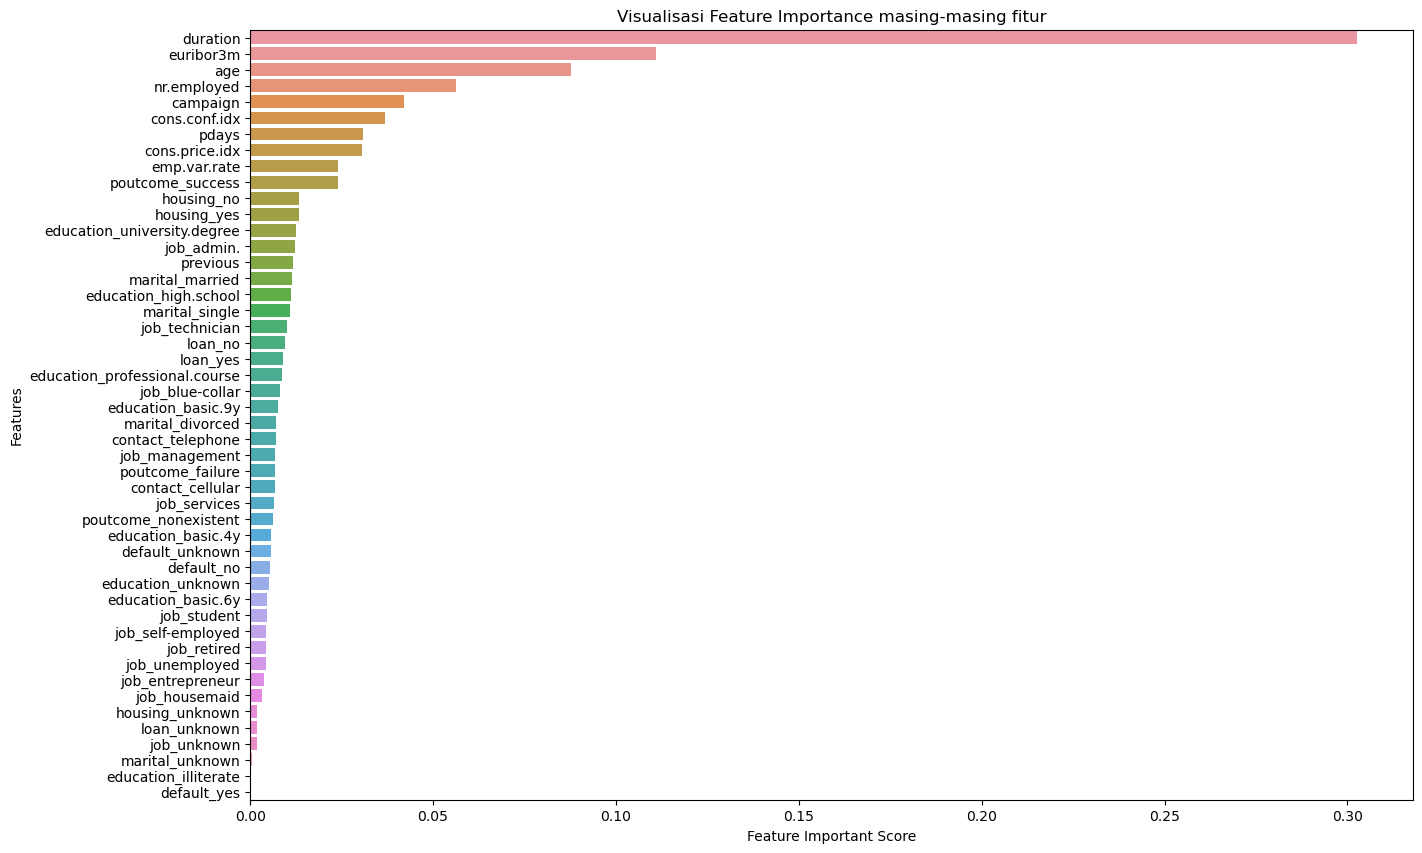

In [58]:
# Visualisasi features importance 
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

# Kesimpulan

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Sebagian besar klien yang ditunjuk sebagai target kampanye pemasaran bank tersebut memilih untuk tidak berlangganan deposit berjangka, yaitu sebanyak 36537 klien. Di sisi lain, terdapat 4639 klien yang memilih untuk berlangganan deposit berjangka.
2. Rata-rata umur klien yang ditunjuk sebagai target kampanye pemasaran bank adalah 40 tahun dengan umur termuda 17 tahun dan umur tertuanya adalah 98 tahun. Jumlah klien terbanyak yang ditunjuk sebagai target adalah klien yang berumur sekiar 30-40 tahun.
3. Durasi dalam telepon yang dilakukan dengan klien semakin lama, kemungkinan klien untuk memilih berlangganan deposito berjangka semakin besar, karena durasi dalam telepon memiliki korelasi paling kuat terhadap variabel y.
4. Karakteristik sosial dan ekonomi memiliki korelasi negatif dengan variabel y.
5. Mayoritas klien adalah klien dengan status sudah menikah, dengan pekerjaan mayoritas sebagai admin, tidak memiliki beban hutang, dan mempunyai gelar pendidikan *university degree*.
6. Algoritma Random Forest memiliki performa klasifikasi yang cenderung lebih baik dari yang lain. Nilai akurasi yang dihasilkan sebesar 0.91, nilai presisi sebesar 0.65, nilai recall 0.47, dan f1-score sebesar 0.53.
7. Untuk meningkatkan performa prediksi klasifikasi, diperlukan penanganan pada data *imbalanced* dan dilakukan *hypertuning parameter*.